# Tarea 4. Visión computacional

Guillermo Segura Gómez

## Exercice 1 (Property of the convolution operator)
Let $F$ be the operator defined, for $f \in L^1(\mathbb{R})$, by
$$
F(f): u \longmapsto \int_{\mathbb{R}} f(x) e^{-2 i \pi x u} d x,
$$
where $i$ the imaginary complex number.
Given $f, g \in L^1(\mathbb{R})$, show that $F(f * g)=F(f) F(g)$.

---

La convolución de dos funciones $f$ and $g$ definidas en los relaes $\mathbb{R}$ se definen por la siguiente integral:

$$
(f * g)(x) = \int_{\mathbb{R}} f(\tau) g(x - \tau) d\tau
$$

Para demostrar la propiedad $F(f * g) = F(f)F(g)$ para el operador $F$, aplicamos la definición de convolución para las funciones $f$ y $g$, al operador $F$.

Dado $F(f): u \mapsto \int_{\mathbb{R}} f(x) e^{-2 i \pi x u} dx$, para la convolución $f * g$, se tiene lo siguiente:

$$
F(f * g): u \mapsto \int_{\mathbb{R}} (f * g)(x) e^{-2 i \pi x u} dx
$$

Utilizando la definición de convolución dentro de la integral tenemos:

$$
F(f * g): u \mapsto \int_{\mathbb{R}} \left( \int_{\mathbb{R}} f(\tau) g(x - \tau) d\tau \right) e^{-2 i \pi x u} dx
$$

Ahora, recordando un resultado del análisis matemático, el teorema de Fubini [1] establece que si tienes una función $f(x, y)$ que es integrable en el producto de espacios medibles $X \times Y$, entonces la integral de $f$ sobre $X \times Y$ puede ser computada como una integral iterada de dos maneras, siempre y cuando la integral absoluta de $f$ sobre $X \times Y$ sea finita. En términos más formales:

Si $f: X \times Y \rightarrow \mathbb{R}$ es una función medible tal que $\int_{X \times Y} |f(x, y)| d(x, y) < \infty$, entonces:

1. La función $f$ es integrable sobre $X \times Y$.
2. Las funciones $x \mapsto \int_Y f(x, y) dy$ y $y \mapsto \int_X f(x, y) dx$ son integrables sobre $X$ y $Y$, respectivamente.
3. Se cumple que:
   $$
   \int_{X \times Y} f(x, y) d(x, y) = \int_X \left( \int_Y f(x, y) dy \right) dx = \int_Y \left( \int_X f(x, y) dx \right) dy
   $$

En otras palabras, si la función $f(x, y)$ y su valor absoluto son suficientemente "buenos" (es decir, medibles e integrables), entonces se puede calcular la integral doble de $f$ sobre el dominio $X \times Y$ como una serie de dos integrales iteradas, y el orden en que se realizan estas integrales no altera el resultado final.

Podemos utilizar teorema de Fubini, para cambiar el orden de integración, se sigue que:

$$
\int_{\mathbb{R}} \left( \int_{\mathbb{R}} f(\tau) g(x - \tau) d\tau \right) e^{-2 i \pi x u} dx = \int_{\mathbb{R}} f(\tau) \left( \int_{\mathbb{R}} g(x - \tau) e^{-2 i \pi x u} dx \right) d\tau
$$

Ahora, si observamos la integral de la derecha, tenemos lo siguiente:

$$
\left( \int_{\mathbb{R}} g(x - \tau) e^{-2 i \pi x u} dx \right)
$$

Realizando la sustitución $y = x - \tau$, lo que implica que $dx = dy$. La integral se convierte en:

$$
\int_{\mathbb{R}} g(y) e^{-2 i \pi (y + \tau) u} dy
$$

Entonces

$$
F(f * g): u \mapsto \int_{\mathbb{R}} f(\tau) \left( \int_{\mathbb{R}} g(y) e^{-2 i \pi (y + \tau) u} dy \right) d\tau
$$

La exponencial tiene una dependencia en $\tau$, por la propiedad de la suma de las exponenciales y por el hecho de que le integral interna no depende de $\tau$, sacamos el término exponencial que depende de esa variable, por lo cual nos queda

$$
F(f * g): u \mapsto \int_{\mathbb{R}} f(\tau) \left( \int_{\mathbb{R}} g(y) e^{-2 i \pi (y) u} dy \right) e^{-2 i \pi (\tau) u} d\tau
$$

se sigue separando las integrales ya que en este punto sus variables son independientes

$$
F(f * g): u \mapsto \int_{\mathbb{R}} f(\tau) e^{-2 i \pi (\tau) u} d\tau \left( \int_{\mathbb{R}} g(y) e^{-2 i \pi (y) u} dy \right)
$$

Por la definición de $F$ encontramos que parte derecha es la aplicación de $F$ a las funciones $f$ y $g$, por lo que

$$
F(f * g): u \mapsto F(f) F(g)
$$

que era lo que queríamos demostrar. Por lo tanto queda demostrado.

## Exercice 2 (Noise removal with median filter)
The median filter is an image processing technique which consists of, for each pixel of a grey-level image, calculating the median value in a neighborhood of the pixel for some window size determined previously by the user (See Fig. 0.1). This is a well-known simple technique to remove the noise in images.

The aim of this exercise is to determine the best strategy to denoise a color image using
the median filter.

**1. Implement the median filter technique for one-channel images**:
- inputs : a one-channel image and a window size.
- output : denoised image.
For simplicity, do not apply the filter when it exceeds the image domain.

---

El **filtro mediano** es una técnica de filtrado no lineal, se utiliza en el procesamiento de imágenes, especialmente eficaz para eliminar el ruido de tipo "sal y pimienta" [2]. Este tipo de ruido se caracteriza por la presencia de píxeles aislados que son notablemente más brillantes o más oscuros que el área circundante.

La operación básica del filtro mediano implica reemplazar cada píxel de la imagen por la mediana de los píxeles en su vecindad, definida por un tamaño de ventana específico, por ejemplo, 3x3, 5x5, etc. A diferencia de la media, que es el promedio de los valores, la mediana es el valor central de un conjunto de números, lo que hace que el filtro sea menos sensible a los valores extremos y por lo tanto más efectivo para mantener los bordes mientras se reduce el ruido.

El proceso de aplicación del filtro mediano implica los siguientes pasos:
1. Centrar una ventana de tamaño predefinido sobre cada píxel de la imagen.
2. Recolectar los valores de los píxeles dentro de esta ventana.
3. Ordenar estos valores.
4. Reemplazar el valor del píxel central por la mediana de este conjunto ordenado.

En el contexto de imágenes en escala de grises, esto se aplica directamente ya que cada píxel tiene un solo valor de intensidad. Para imágenes en color, el proceso puede aplicarse de forma independiente a cada canal de color o convertirse primero a una representación más adecuada que separe la luminancia del color, aplicando el filtro solo a la componente de luminancia para evitar distorsiones de color.

Para aplicar el filtro mediano a una imagen de un solo canal, utilizamos la funcion de filtro mediano de la libreria **scipy**.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from scipy.ndimage import median_filter

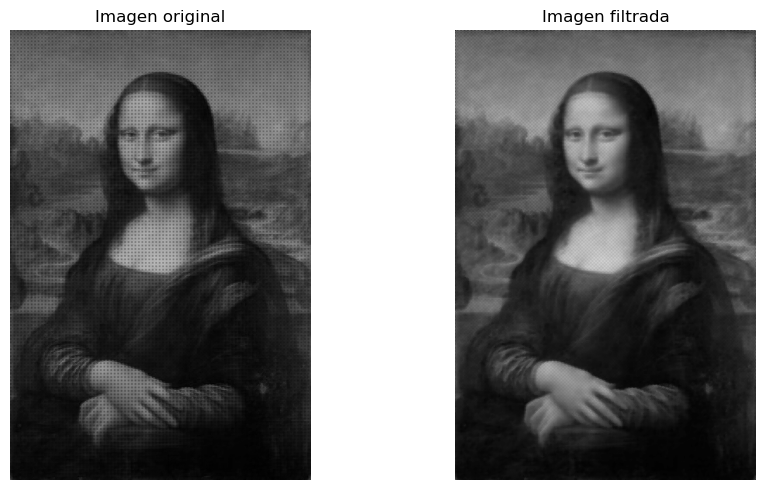

In [3]:
# Funcion que aplica el filtro mediano para una imagen de un canal
def apply_median_filter(image, window_size):
    # Aplica el filtro mediano usando scipy
    denoised_image = median_filter(image, size=window_size)
    return denoised_image

# Path a las imágenes
images = glob.glob('/home/guillermosegura/Desktop/Segundo Semestre/ComputerVision/Tarea 4/img3.png')

# Inicializamos la figura para graficar
plt.figure(figsize=(10, len(images) * 5))

for i, img_path in enumerate(images):
    # Lee la imagen en escala de grises
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # Aplica el filtro mediano
    filtered_img = apply_median_filter(img, window_size=3)

    # Muestra la imagen original
    plt.subplot(len(images), 2, 2*i + 1)
    plt.imshow(img, cmap='gray')
    plt.title("Imagen original")
    plt.axis('off')

    # Muestra la imagen procesada
    plt.subplot(len(images), 2, 2*i + 2)
    plt.imshow(filtered_img, cmap='gray')
    plt.title("Imagen filtrada")
    plt.axis('off')

plt.tight_layout()
plt.show()

**2. Implement the median filter technique for color images** :
- inputs : a color image, three window sizes (one per component) and a color space (RGB or
Opp).
- output : the denoised image expressed in RGB after applying the method implemented in 1. to each of the components of the image in the selected color space and with the selected window sizes.

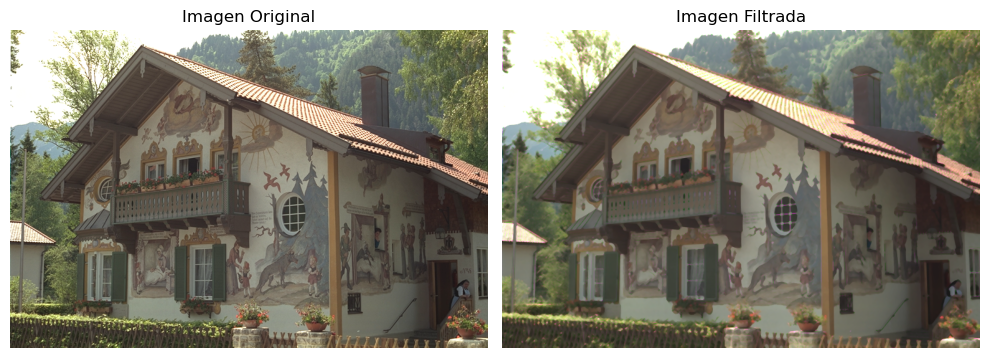

In [4]:
# Funcion que implementa el filtro mediano para imagenes de un canal RGB
def apply_median_filter(image, window_sizeR, window_sizeG, window_sizeB):
    # Divide la imagen en sus componentes de color
    R, G, B = image[:,:,0], image[:,:,1], image[:,:,2]
    
    # Aplica el filtro mediano a cada canal con su respectivo tamaño de ventana
    R_filtered = median_filter(R, size=window_sizeR)
    G_filtered = median_filter(G, size=window_sizeG)
    B_filtered = median_filter(B, size=window_sizeB)
    
    # Reconstruye la imagen combinando los canales filtrados
    denoised_image = cv2.merge([R_filtered, G_filtered, B_filtered])
    return denoised_image

# Path a las imágenes
images = glob.glob('/home/guillermosegura/Desktop/Segundo Semestre/ComputerVision/Tarea 4/img2.png')

# Inicializamos la figura para graficar
plt.figure(figsize=(10, len(images) * 5))

for i, img_path in enumerate(images):
    # Lee la imagen en color
    img = cv2.imread(img_path)
    
    # Convierte la imagen a RGB (OpenCV usa BGR por defecto)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Aplica el filtro mediano con tamaños de ventana diferentes para cada canal
    filtered_img = apply_median_filter(img_rgb, 3, 5, 3)

    # Muestra la imagen original
    plt.subplot(len(images), 2, 2*i + 1)
    plt.imshow(img_rgb)
    plt.title("Imagen Original")
    plt.axis('off')

    # Muestra la imagen procesada
    plt.subplot(len(images), 2, 2*i + 2)
    plt.imshow(filtered_img)
    plt.title("Imagen Filtrada")
    plt.axis('off')

plt.tight_layout()
plt.show()

**3. Apply the method implemented in 2. to the image noisy−img1.png**. 

You’ll test different color spaces and different window sizes. Evaluate your result by computing the PSNR between
the denoised image and the original clean image img1.png. Which strategy provides
the best results ?

--- 

Aplicamos el metodo a la imagen *noisy−img1.png*. Primero es necesario modificar la función **apply_median_filter** para que también acepte un argumento del espacio de color (ya que originalmente se construyo para un espacio tipo RGB). Esto para posterior aplicar esta función a *noisy-img1.png* en diferentes espacios de color como RGB y HSV y con diferentes tamaños de ventana. Adicional, se desarrolla una funcion que convierte entre espacios de color.

Admas es necesario aplicar una prueba tipo PSNR. El PSNR, o "Peak Signal-to-Noise Ratio", es una medida utilizada para evaluar la calidad de una imagen reconstruida o procesada en comparación con la original [2]. 

El PSNR se define en términos del MSE (Mean Squared Error), que es el promedio de los cuadrados de las diferencias entre los píxeles correspondientes de las dos imágenes. El PSNR se calcula utilizando la siguiente fórmula:

$$
PSNR = 10 \cdot \log_{10} \left( \frac{MAX_I^2}{MSE} \right)
$$

Donde:
- $MAX_I$ es el valor máximo posible de un píxel en la imagen. Para imágenes con una profundidad de color de 8 bits por canal, este valor sería 255.
- $MSE$ es el error cuadrático medio entre la imagen original y la imagen reconstruida o procesada.

Cuanto mayor sea el valor de PSNR, mejor será la calidad de la imagen reconstruida comparada con la original. Un valor alto de PSNR indica que el ruido o las diferencias entre las imágenes son bajos, mientras que un valor bajo de PSNR indica una calidad pobre y grandes diferencias entre las imágenes.

Para poder utilizar el metodo PSNR hacemos uso de la libreria `scikit-image`. La función que calcula el PSNR en `scikit-image` se encuentra dentro del módulo `metrics`, específicamente es `skimage.metrics.peak_signal_noise_ratio`.


In [5]:
from skimage.metrics import peak_signal_noise_ratio as compare_psnr

# Convertir entre espacios de color (RGB, HSV)
def convert_color_space(image, color_space):
    if color_space == 'RGB':
        return image
    elif color_space == 'HSV':
        return cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    else:
        return image

def apply_median_filter(image, window_sizes, color_space='RGB'):
    # Convierte la imagen al espacio de color deseado
    img_converted = convert_color_space(image, color_space)
    
    # Aplica el filtro mediano a cada canal
    channels_filtered = [median_filter(img_converted[:, :, i], size=window_sizes[i]) for i in range(3)]
    
    # Reconstruye la imagen filtrada
    filtered_image = np.stack(channels_filtered, axis=-1)
    
    # Convierte de regreso a RGB si es necesario
    if color_space != 'RGB':
        filtered_image = convert_color_space(filtered_image, 'RGB')
    
    return filtered_image

# Cargar imagenes
noisy_image = cv2.imread('/home/guillermosegura/Desktop/Segundo Semestre/ComputerVision/Tarea 4/noisy_img1.png')
noisy_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)  # Convertir a RGB
clean_image = cv2.imread('/home/guillermosegura/Desktop/Segundo Semestre/ComputerVision/Tarea 4/img1.png')
clean_image = cv2.cvtColor(clean_image, cv2.COLOR_BGR2RGB)  # Convertir a RGB

# Definir tamaños de ventana y espacios de color para probar
window_sizes_list = [(3, 3, 3), (5, 5, 5)]
color_spaces = ['RGB', 'HSV']

# Aplicar filtro y evaluar PSNR para cada combinación
for color_space in color_spaces:
    for window_sizes in window_sizes_list:
        denoised_image = apply_median_filter(noisy_image, window_sizes, color_space)
        psnr = compare_psnr(clean_image, denoised_image)
        print(f"PSNR para {color_space} con ventana {window_sizes}: {psnr}")

PSNR para RGB con ventana (3, 3, 3): 28.31693925046372
PSNR para RGB con ventana (5, 5, 5): 28.615637476404952
PSNR para HSV con ventana (3, 3, 3): 9.96242924343752
PSNR para HSV con ventana (5, 5, 5): 10.04806130124982


**4. Analyze your results.**

De los resultados podemos analizar lo siguiente:

1. **Espacio de Color RGB**: Los valores de PSNR para el espacio de color RGB son significativamente más altos que para el espacio de color HSV. Esto indica que las imágenes denoised en el espacio de color RGB están más cerca de la imagen original en términos de calidad. Entre los dos tamaños de ventana probados en el espacio RGB, el tamaño de ventana (5, 5, 5) dio un valor de PSNR ligeramente más alto que el tamaño de ventana (3, 3, 3). Esto sugiere que un tamaño de ventana más grande podría estar ayudando a eliminar más ruido sin perder demasiados detalles, lo que resulta en una calidad ligeramente mejor.

2. **Espacio de Color HSV**: Los valores de PSNR en el espacio de color HSV son mucho más bajos que en RGB, lo que indica una calidad mucho peor en comparación con la imagen original. Esto puede deberse a que la manipulación del ruido en los canales de tono y saturación del espacio HSV no es tan buena como trabajar directamente con los canales de color en RGB para este tipo específico de imagen. Aunque hay una pequeña mejora al aumentar el tamaño de la ventana de (3, 3, 3) a (5, 5, 5), ambos valores de PSNR siguen siendo considerablemente bajos, por lo que el espacio HSV no es el más adecuado para este tipo de filtrado.

**Conclusion**

Para la imagen `noisy-img1.png` y el tipo de ruido presente en ella, el filtrado mediano en el espacio de color RGB con un tamaño de ventana de (5, 5, 5) proporciona los mejores resultados en términos de PSNR.

## Exercice 3 (Edge-preserving regularization)
Convolving an image with a Gaussian kernel not only reduces the noise but smoothes the edges as well. The aim of this exercise is to construct a simple edge-preserving image regularization method which generalizes the convolution with a Gaussian.
Let $I_0=\left(I_0^1, I_0^2, I_0^3\right): \Omega \subset \mathbb{R}^2 \longrightarrow \mathbb{R}^3$ be a color image expressed in the $R G B$ color space. We consider the following regularization operator
$$
I^c(i, j)=\sum_{(k, l) \in \Omega_{(i, j)}} K_\sigma((i, j),(k, l)) I_0^c(k, l) \quad c=1,2,3
$$
where $\Omega_{(i, j)}$ is a neighborhood of $(i, j)$, and the kernel $K_\sigma((i, j),(k, l))$ generalizes the 2D Gaussian kernel in the sense that $K_\sigma$ is of the form
$$
K_\sigma((i, j),(k, l))=A e^{-\frac{d((i, j),(k, l))^2}{2 \sigma^2}}
$$
for some distance function $d: \Omega \times \Omega \longrightarrow \mathbb{R}^{+}$. The term $A$ is the normalization factor, i.e $A$ is such that
$$
\sum_{(k, l) \in \Omega_{(i, j)}} K_\sigma((i, j),(k, l))=1 .
$$
**1. Determine a distance function $d$ such that**:
- $d((i, j),(k, l))$ is small if the pixels $(i, j)$ and $(k, l)$ are close to each other and the color vectors $I_0(i, j)$ and $I_0(k, l)$ are close to each other.
- $d((i, j),(k, l))$ is high if the pixels $(i, j)$ and $(k, l)$ are far from each other and the color vectors $I_0(i, j)$ and $I_0(k, l)$ are far from each other.

Reminder : a distance function satisfies three properties : identity, symmetry and triangular inequality.

---

Para abordar el ejercicio de regularización generalizando la convolución con un kernel Gaussiano, vamos a definir una función de distancia $d$ que cumpla con los criterios que se especifican. Buscamos una función de distancia que sea pequeña cuando los píxeles y sus colores sean similares, y grande en caso contrario. Esto ayuda a preservar los bordes al aplicar el operador de regularización.

Una posible función de distancia que cumple con estos requisitos es la combinación de la distancia espacial entre píxeles y la distancia en el espacio de color. Esta se puede definir como:

$$
d((i, j), (k, l)) = \sqrt{\alpha \cdot d_s((i, j), (k, l))^2 + \beta \cdot d_c(I_0(i, j), I_0(k, l))^2}
$$

Donde:
- $d_s((i, j), (k, l))$ es la distancia espacial euclidiana entre los píxeles $(i, j)$ y $(k, l)$, definida como 

$$
d_s = \sqrt{(i-k)^2 + (j-l)^2}
$$

- $d_c(I_0(i, j), I_0(k, l))$ es la distancia en el espacio de color entre los colores de los píxeles $(i, j)$ y $(k, l)$ definida como 

$$
d_c = \sqrt{(I_0^1(i, j) - I_0^1(k, l))^2 + (I_0^2(i, j) - I_0^2(k, l))^2 + (I_0^3(i, j) - I_0^3(k, l))^2}
$$

- $\alpha$ y $\beta$ son parámetros que permiten ponderar la importancia relativa de la distancia espacial frente a la distancia en el espacio de color.

Esta función de distancia cumple con las propiedades para una regularización que preserve los bordes, es decir es pequeña para píxeles cercanos con colores similares y grande para píxeles lejanos o con colores muy diferentes. Esto significa que el operador de regularización tendrá un efecto suavizante más fuerte en regiones homogéneas de la imagen y preservará los bordes donde hay cambios bruscos en el color.

**2. Apply the operator (0.1) to the image img2.png where**:
- the distance $d$ in (0.2) is the one constructed in question 1.
- the kernel $K_\sigma$ in (0.2) has a support of size $5 \times 5$, and $\sigma=10$.
- The $R G B$ values of $I_0$ are normalized (i.e. the values are in the range [0,1]).

Para aplicar el operador de regularización a `img2.png` utilizando la distancia que definimos realizamos lo siguiente: Utilizamos un soporte de kernel de tamaño $5 \times 5$ y $\sigma=10$

Lo primero es cargar la imagen y normalizar sus valores RGB al rango $[0,1]$.

In [6]:
# Cargar la imagen
img = cv2.imread('/home/guillermosegura/Desktop/Segundo Semestre/ComputerVision/Tarea 4/img2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a RGB

# Normalizar los valores RGB al rango [0,1]
img_normalized = img / 255.0

Ahora, definimos la función de distancia y el kernel $K_\sigma$

In [7]:
def K_sigma(i, j, k, l, sigma=10):
    # Calcula la distancia espacial y de color
    d_s = np.sqrt((i-k)**2 + (j-l)**2)
    d_c = np.linalg.norm(img_normalized[i,j] - img_normalized[k,l])
    
    # Parámetros alpha y beta
    alpha, beta = 1, 1 
    
    # Calcula la distancia combinada
    d_combined = np.sqrt(alpha * d_s**2 + beta * d_c**2)
    
    # Calcula el valor del kernel
    return np.exp(-d_combined**2 / (2 * sigma**2))

Ahora aplicamos el operador a cada píxel de la imagen.

In [8]:
# Crear una imagen de salida vacía
img_out = np.zeros_like(img_normalized)

# Definir el tamaño del soporte del kernel
kernel_size = 5
offset = kernel_size // 2

# Iterar sobre cada píxel de la imagen
for i in range(offset, img_normalized.shape[0] - offset):
    for j in range(offset, img_normalized.shape[1] - offset):
        # Inicializar acumuladores y el factor de normalización A
        acc = np.zeros(3)
        A = 0
        
        # Iterar sobre la vecindad del píxel
        for k in range(-offset, offset + 1):
            for l in range(-offset, offset + 1):
                k_sigma_val = K_sigma(i, j, i+k, j+l)
                acc += k_sigma_val * img_normalized[i+k, j+l]
                A += k_sigma_val
        
        # Asignar el valor regularizado al píxel de salida
        img_out[i,j] = acc / A

# Imagen de salida
img_out = np.clip(img_out, 0, 1)

Visualizamos la imagen

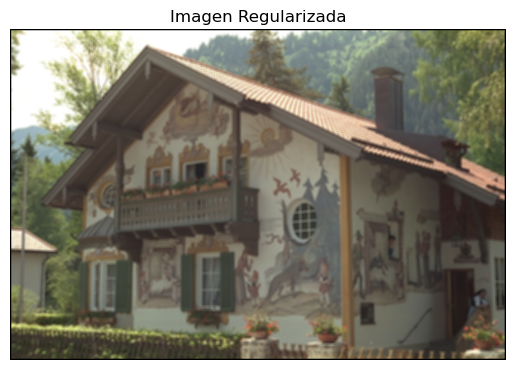

In [9]:
plt.imshow(img_out)
plt.title('Imagen Regularizada')
plt.axis('off')
plt.show()

# Guardar imagen
# img_out_save = (img_out * 255).astype(np.uint8)
# cv2.imwrite('img2_regularizada.png', cv2.cvtColor(img_out_save, cv2.COLOR_RGB2BGR))

## Exercice 4 (Demosaicking)
The camera sensor produces an image in which for each pixel we only get one of the image
channel intensity values (either red, green or blue) as we can see in Fig. 0.2.
It is then required to find an estimate of the other two missing values to obtain RGB value
at each pixel. This is done by an interpolation process called demosaicking, which produces
an image with 3 channels. (see Fig. 0.3 and Fig. 0.4).

The following figure describes a simple interpolation method. Here, the given pixel has only
the red channel intensity, and green and blue values at this pixel are interpolated according
to the 2 formulas.

**1. Implement the demosaicking method described in Fig. 0.5. For simplification, do not perform interpolation at the boundary of the image domain (set the boundary values of the demosaicked image to (0,0,0))**


En patrón Bayer, cada píxel capta un solo color: rojo, verde o azul. El demosaicking es el proceso de reconstruir una imagen en color completo a partir de esta información parcial [2].

El método de interpolación implica calcular los valores de los canales que faltan en cada píxel basándonos en los valores de los píxeles vecinos. Por ejemplo, si un píxel captura el color rojo, calcularíamos los valores verde y azul basándonos en los píxeles vecinos. Para implementar esto, realizamos la funcion en python


In [10]:
def demosaic_simple(image):
    # Dimensiones de la imagen
    height, width = image.shape
    
    # Inicializa una imagen de salida con 3 canales
    output_image = np.zeros((height, width, 3), dtype=np.uint8)
    
    # Itera sobre cada píxel de la imagen
    for i in range(1, height-1):
        for j in range(1, width-1):
            # Copia el valor actual del píxel al canal correspondiente en la imagen de salida
            # Asume que el patrón Bayer es RG/GB para simplificar
            if (i % 2 == 0 and j % 2 == 0):  # Píxeles azules
                output_image[i, j, 2] = image[i, j]  # Azul
                # Interpola los valores verde y rojo
                output_image[i, j, 1] = (image[i-1, j] + image[i+1, j] + image[i, j-1] + image[i, j+1]) // 4
                output_image[i, j, 0] = (image[i-1, j-1] + image[i-1, j+1] + image[i+1, j-1] + image[i+1, j+1]) // 4
            elif (i % 2 == 1 and j % 2 == 1):  # Píxeles rojos
                output_image[i, j, 0] = image[i, j]  # Rojo
                # Interpola los valores verde y azul
                output_image[i, j, 1] = (image[i-1, j] + image[i+1, j] + image[i, j-1] + image[i, j+1]) // 4
                output_image[i, j, 2] = (image[i-1, j-1] + image[i-1, j+1] + image[i+1, j-1] + image[i+1, j+1]) // 4
            else:  # Píxeles verdes
                output_image[i, j, 1] = image[i, j]  # Verde
                # Interpola los valores rojo y azul
                if i % 2 == 0:  # Patrón GB
                    output_image[i, j, 0] = (image[i, j-1] + image[i, j+1]) // 2
                    output_image[i, j, 2] = (image[i-1, j] + image[i+1, j]) // 2
                else:  # Patrón RG
                    output_image[i, j, 2] = (image[i, j-1] + image[i, j+1]) // 2
                    output_image[i, j, 0] = (image[i-1, j] + image[i+1, j]) // 2
    
    # Devuelve la imagen demosaicked
    return output_image


**2. Apply the interpolation to the images img3.png and img4.png.**

Ahora aplicamos la funcion que construimos a las imagenes mostradas con el patron bayer

/tmp/ipykernel_54832/3892168525.py:21: RuntimeWarning: overflow encountered in scalar add
  output_image[i, j, 1] = (image[i-1, j] + image[i+1, j] + image[i, j-1] + image[i, j+1]) // 4
/tmp/ipykernel_54832/3892168525.py:16: RuntimeWarning: overflow encountered in scalar add
  output_image[i, j, 1] = (image[i-1, j] + image[i+1, j] + image[i, j-1] + image[i, j+1]) // 4
/tmp/ipykernel_54832/3892168525.py:17: RuntimeWarning: overflow encountered in scalar add
  output_image[i, j, 0] = (image[i-1, j-1] + image[i-1, j+1] + image[i+1, j-1] + image[i+1, j+1]) // 4


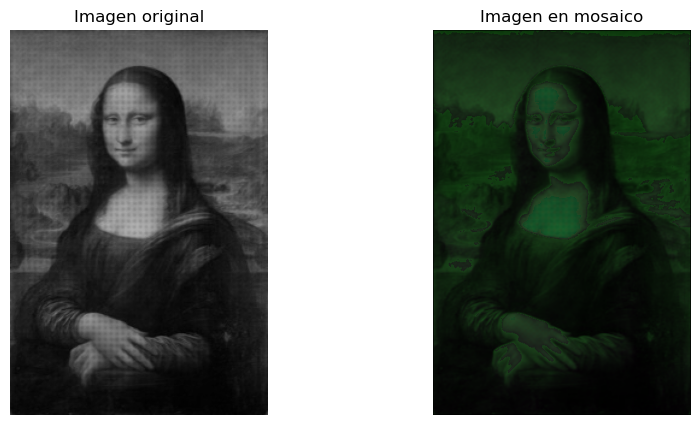

In [12]:
# Cargar la imagen
sensor_image = cv2.imread('/home/guillermosegura/Desktop/Segundo Semestre/ComputerVision/Tarea 4/img3.png', cv2.IMREAD_GRAYSCALE)

# Aplica el método de demosaicking
demosaicked_image = demosaic_simple(sensor_image)

# Configura el tamaño de la figura
plt.figure(figsize=(10, 5))

# Muestra la imagen del sensor
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
plt.imshow(sensor_image, cmap='gray')
plt.title('Imagen original')
plt.axis('off')  # Oculta los ejes

# Muestra la imagen resultante después del demosaicking
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
plt.imshow(demosaicked_image)
plt.title('Imagen en mosaico')
plt.axis('off')  # Oculta los ejes

plt.show()

/tmp/ipykernel_54832/3892168525.py:22: RuntimeWarning: overflow encountered in scalar add
  output_image[i, j, 2] = (image[i-1, j-1] + image[i-1, j+1] + image[i+1, j-1] + image[i+1, j+1]) // 4
/tmp/ipykernel_54832/3892168525.py:31: RuntimeWarning: overflow encountered in scalar add
  output_image[i, j, 0] = (image[i-1, j] + image[i+1, j]) // 2
/tmp/ipykernel_54832/3892168525.py:21: RuntimeWarning: overflow encountered in scalar add
  output_image[i, j, 1] = (image[i-1, j] + image[i+1, j] + image[i, j-1] + image[i, j+1]) // 4
/tmp/ipykernel_54832/3892168525.py:30: RuntimeWarning: overflow encountered in scalar add
  output_image[i, j, 2] = (image[i, j-1] + image[i, j+1]) // 2
/tmp/ipykernel_54832/3892168525.py:17: RuntimeWarning: overflow encountered in scalar add
  output_image[i, j, 0] = (image[i-1, j-1] + image[i-1, j+1] + image[i+1, j-1] + image[i+1, j+1]) // 4
/tmp/ipykernel_54832/3892168525.py:16: RuntimeWarning: overflow encountered in scalar add
  output_image[i, j, 1] = (image[

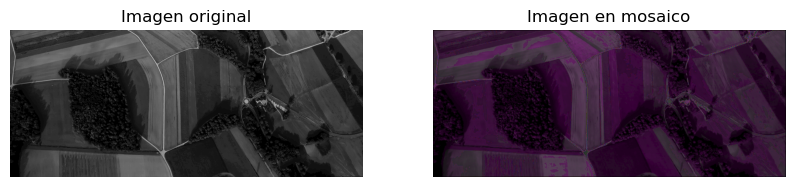

In [13]:
# Cargar la imagen
sensor_image = cv2.imread('/home/guillermosegura/Desktop/Segundo Semestre/ComputerVision/Tarea 4/img4.png', cv2.IMREAD_GRAYSCALE)

# Aplica el método de demosaicking
demosaicked_image = demosaic_simple(sensor_image)

# Configura el tamaño de la figura
plt.figure(figsize=(10, 5))

# Muestra la imagen del sensor
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
plt.imshow(sensor_image, cmap='gray')
plt.title('Imagen original')
plt.axis('off')  # Oculta los ejes

# Muestra la imagen resultante después del demosaicking
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
plt.imshow(demosaicked_image)
plt.title('Imagen en mosaico')
plt.axis('off')  # Oculta los ejes

plt.show()

# Bibliografía 

[1] Rudin, Walter. Principles of mathematical analysis. Vol. 3. New York: McGraw-hill, 1964.

[2] Szeliski, Richard. Computer vision: algorithms and applications. Springer Nature, 2022.